In [5]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [7]:
np.random.seed(seed=11)

## Simula:

### Una muestra ε de n = 500 de una distribución normal con media μ = 0 y desviación típica σ = 1.

In [13]:
muestra_normal = np.random.normal(0,1,500)

### Una muestra x de n = 500 de una distribución uniforme [0, 200].

In [14]:
muestra_uniforme = np.random.randint(0,200,500)

### Construye las muestra Y 1 e Y 2 que sean igual a:
### ${Y1_i = 100 + 200 · X_i + ε · X_i}$ para ${i = 1, ... , n.}$
### ${Y2_i = 100 + 200 · X_i + ε }$ para ${i = 1, ... , n.}$

In [15]:
y1 = 100 + 200*muestra_uniforme+muestra_normal*muestra_uniforme
#transponer vector x
x = muestra_uniforme.reshape((-1, 1))
lm1 = linear_model.LinearRegression()
model1 = lm1.fit(x, y1)
# obtener valores modelo-----------------------------------------
y_pred1 = model1.predict(x)
# obtener residuos-----------------------------------------------
residuos1 = y1 - y_pred1

In [16]:
y2 = 100 + 200 * muestra_uniforme + muestra_normal
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(x, y2)
# obtener valores modelo-----------------------------------------
y_pred2 = model2.predict(x)
# obtener residuos-----------------------------------------------
residuos2 = y2 - y_pred2

### a) Obtén un modelo de regresión lineal Y = β 0 + β 1 · X + error para Y1 e Y2 y representa gráficamente los residuos de los modelos.

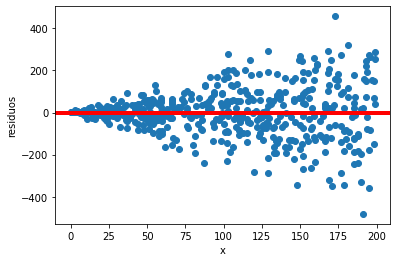

In [17]:
plt.scatter(x, residuos1)
plt.axhline(0, color = "red", linewidth = 4)
plt.xlabel("x")
plt.ylabel("residuos")
plt.show()

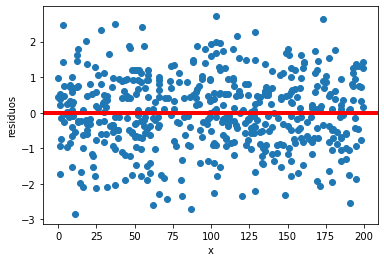

In [18]:
plt.scatter(x, residuos2)
plt.axhline(0, color = "red", linewidth = 4)
plt.xlabel("x")
plt.ylabel("residuos")
plt.show()

### b) Realiza la prueba de Breusch-Pagan para cada uno de los modelos.

In [26]:
m1 = sm.OLS(y1, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid,
exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f" %(bp1))

El resultado del test Breusch-Pagan es: p.valor = 0.000


In [27]:
m2 = sm.OLS(y2, sm.add_constant(x)).fit()
bp2 = sms.het_breuschpagan(resid = m2.resid,
exog_het = m2.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(bp2))

El resultado del test Breusch-Pagan es: p.valor = 0.881


### Se corrobora, como se preveía, que el modelo de regresión Y1 es heterocedástico, y el modelo de regresión Y2 es homocedástico.